# 对数据先聚类，然后进行降维处理

In [68]:
import pandas as pd

# 读取基因表达矩阵文件，假设文件名为 'gene_expression_matrix.csv'
gene_expression_matrix = pd.read_csv('GSE12417_IDS.csv', index_col=0) ## 行索引是基因名称，列索引为样本名称
## gene_expression_matrix = gene_expression_matrix.T ##进行转置，因为聚类通常对于样本名称进行
gene_expression_matrix

,GSM316652,GSM316653,GSM316654,GSM316655,GSM316656,GSM316657,GSM316658,GSM316659,GSM316660,GSM316661,...,GSM316721,GSM316722,GSM316723,GSM316724,GSM316725,GSM316726,GSM316727,GSM316728,GSM316729,GSM316730
MIR4640,6.475767,6.276998,6.209632,6.545823,6.374474,6.573415,6.862311,6.574016,6.448312,6.442266,...,6.782846,6.334576,6.548873,6.712238,6.297676,6.656059,6.257992,6.413911,6.279814,6.717840
RFC2,7.487033,8.750779,8.466397,7.878367,8.290071,7.612642,7.960184,8.360244,7.744902,9.026854,...,7.845507,7.731711,7.737871,7.555684,8.995389,7.488794,7.428128,8.053569,8.246580,7.517074
HSPA6,9.076454,6.607010,7.034148,6.364791,7.826806,6.486318,6.780927,7.367130,10.349547,6.959773,...,8.365272,6.886686,7.446914,7.489753,7.576748,8.050815,6.621469,7.825714,6.836409,6.749742
PAX8,6.364873,6.338852,6.462350,6.422604,6.398193,6.491700,6.545577,6.393162,6.521018,6.422360,...,6.454849,6.422715,6.498489,6.507017,6.401550,6.528832,6.351243,6.337404,6.345826,6.333384
GUCA1A,6.063461,5.937936,5.899133,5.852263,5.965412,5.854034,6.035713,5.996623,6.054953,5.985080,...,5.934997,5.920433,6.099128,5.922560,5.798014,5.999534,5.913017,5.866520,5.888078,5.914810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MROH7-TTC4,8.006716,8.489136,8.633775,8.272266,8.216000,7.549489,8.267044,8.868158,7.663403,8.733833,...,7.726750,8.001286,8.225331,8.290022,9.021801,7.509396,8.125507,8.744150,8.671249,8.624958
LOC102725263,6.310782,6.395657,6.534307,6.341616,6.629346,6.975808,6.738267,6.536123,6.895787,6.752925,...,6.676323,6.642207,6.487119,6.641002,6.625855,6.408850,6.798794,6.781524,6.354652,7.067813
LOC100129924,8.331740,7.971129,8.268160,7.955886,8.609812,8.002221,8.541654,8.441270,7.054583,8.541192,...,7.655560,8.082174,8.318699,8.023994,8.543547,8.350495,8.003687,8.272390,8.428466,7.925671
FAM86DP,5.890989,6.294370,6.325596,6.161604,6.003352,5.832065,6.361344,6.695766,6.014423,6.456297,...,6.289271,6.182283,6.295232,6.220668,7.754529,6.021170,5.795652,7.161872,6.355406,6.841640


## 进行聚类分析

In [70]:
from sklearn.cluster import AgglomerativeClustering
clusters = clustering.fit_predict(gene_expression_matrix)
# 创建聚类模型，假设分为10个簇
clustering = AgglomerativeClustering(n_clusters=10)

## 将聚类结果与样本名称关联起来

In [71]:
# 将聚类结果添加到基因表达矩阵中
gene_expression_matrix['Cluster'] = clusters

## 进行 t-SNE 降维

In [72]:
from sklearn.manifold import TSNE

In [73]:
# 创建 t-SNE 模型，将数据降到2维
tsne = TSNE(n_components=2, random_state=42)

In [74]:
# 对基因表达矩阵进行 t-SNE 降维，注意排除掉聚类结果列
tsne_result = tsne.fit_transform(gene_expression_matrix.drop('Cluster', axis=1))

In [75]:
# 将 t-SNE 结果添加到原始数据中
gene_expression_matrix['tSNE1'] = tsne_result[:, 0]
gene_expression_matrix['tSNE2'] = tsne_result[:, 1]

In [76]:
gene_expression_matrix

,GSM316652,GSM316653,GSM316654,GSM316655,GSM316656,GSM316657,GSM316658,GSM316659,GSM316660,GSM316661,...,GSM316724,GSM316725,GSM316726,GSM316727,GSM316728,GSM316729,GSM316730,Cluster,tSNE1,tSNE2
MIR4640,6.475767,6.276998,6.209632,6.545823,6.374474,6.573415,6.862311,6.574016,6.448312,6.442266,...,6.712238,6.297676,6.656059,6.257992,6.413911,6.279814,6.717840,4,-65.101082,3.900316
RFC2,7.487033,8.750779,8.466397,7.878367,8.290071,7.612642,7.960184,8.360244,7.744902,9.026854,...,7.555684,8.995389,7.488794,7.428128,8.053569,8.246580,7.517074,2,19.086617,-40.020744
HSPA6,9.076454,6.607010,7.034148,6.364791,7.826806,6.486318,6.780927,7.367130,10.349547,6.959773,...,7.489753,7.576748,8.050815,6.621469,7.825714,6.836409,6.749742,2,-13.237994,-21.916735
PAX8,6.364873,6.338852,6.462350,6.422604,6.398193,6.491700,6.545577,6.393162,6.521018,6.422360,...,6.507017,6.401550,6.528832,6.351243,6.337404,6.345826,6.333384,4,-59.145092,15.460715
GUCA1A,6.063461,5.937936,5.899133,5.852263,5.965412,5.854034,6.035713,5.996623,6.054953,5.985080,...,5.922560,5.798014,5.999534,5.913017,5.866520,5.888078,5.914810,1,-14.266164,50.729733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MROH7-TTC4,8.006716,8.489136,8.633775,8.272266,8.216000,7.549489,8.267044,8.868158,7.663403,8.733833,...,8.290022,9.021801,7.509396,8.125507,8.744150,8.671249,8.624958,2,29.842638,-40.908798
LOC102725263,6.310782,6.395657,6.534307,6.341616,6.629346,6.975808,6.738267,6.536123,6.895787,6.752925,...,6.641002,6.625855,6.408850,6.798794,6.781524,6.354652,7.067813,4,-41.664238,0.389985
LOC100129924,8.331740,7.971129,8.268160,7.955886,8.609812,8.002221,8.541654,8.441270,7.054583,8.541192,...,8.023994,8.543547,8.350495,8.003687,8.272390,8.428466,7.925671,2,22.272675,-43.551533
FAM86DP,5.890989,6.294370,6.325596,6.161604,6.003352,5.832065,6.361344,6.695766,6.014423,6.456297,...,6.220668,7.754529,6.021170,5.795652,7.161872,6.355406,6.841640,4,-28.746281,14.718410


## 绘制 t-SNE 图并根据聚类结果上色：

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# 设置绘图风格
sns.set(style='whitegrid')

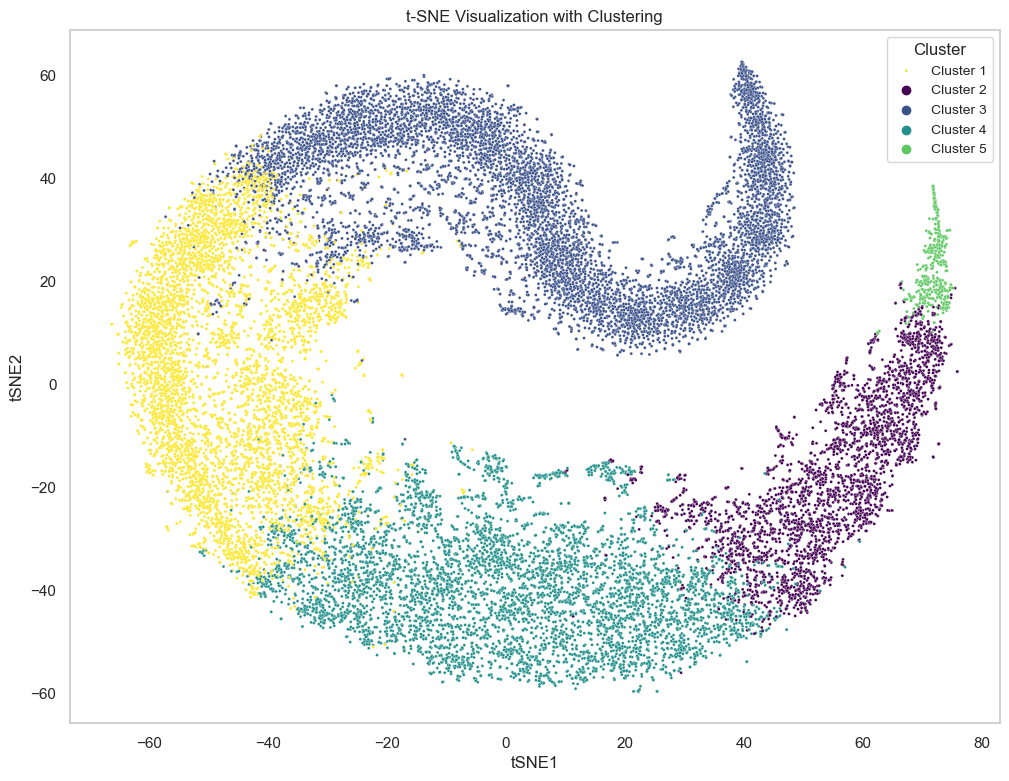

In [92]:
# 创建 t-SNE 图，根据聚类结果上色
plt.figure(figsize=(12, 9))
# 去除背景网格线
plt.grid(False)
sns.scatterplot(x='tSNE1', y='tSNE2', s=4.5,hue='Cluster', data=gene_expression_matrix, palette='viridis', legend='full')
# 显示图例
plt.legend(labels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'], title='Cluster', loc='best', fontsize='small')
# 设置图的标题和坐标轴标签
plt.title('t-SNE Visualization with Clustering')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')

# 显示图
plt.show()